In [71]:
def clean_series(index_file):
    raw_data = read_series(index_file)
    s = "."
    d = "DATE"
    remove_list = []
    for index, data in enumerate(raw_data.copy()):    
        if data[1] == s or data[0] == d:  
            remove_list.append(index) # removes "DATE" row and removes "." 
            continue
        date = data[0]
        price = float(data[1])
        raw_data[index] = (date, price)
    remove_list.sort(reverse=True)
    for i in remove_list:
        raw_data.pop(i)
    return raw_data

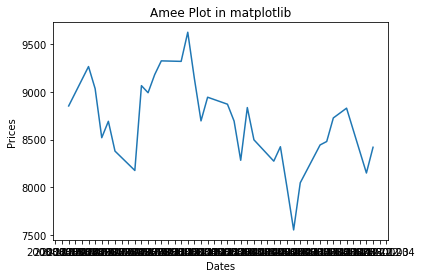

In [95]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def plot_prices(index_file):
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consisting of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    data_set = clean_series(index_file)
    
    # Process x_data
    pre_x_data = [data[0] for data in data_set]
    x_data = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in pre_x_data]
    ax = plt.gca()
    formatter = mdates.DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)
    
    # Process y_data
    y_data = [data[1] for data in data_set]
    
    # Plot data
    plt.title("Amee Plot in matplotlib")
    plt.xlabel("Dates")
    plt.ylabel("Prices")
    plt.plot(x_data,y_data)
    plt.show()

FILE_NAME = "DJIA_34.csv"
plot_prices(FILE_NAME)